## Libraries


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("TaxiFare.csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


## EDA

In [3]:
df.drop(['unique_id'],axis=1,inplace=True)

In [4]:
df.sample()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
42977,11.0,2015-04-15 19:56:38 UTC,-73.969704,40.762112,-73.989388,40.744736,1


In [5]:
df['date_time_of_pickup']=df.date_time_of_pickup.str.replace("UTC"," ")

In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
df.drop(df[df['amount']<=0].index,inplace=True)

In [8]:
df.sample()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
29012,36.65,2009-05-12 15:03:00,-73.87316,40.774065,-73.997507,40.72725,1


In [9]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
df['distance']=((df['latitude_of_pickup']-df['latitude_of_dropoff'])**2+(df['longitude_of_pickup']-df['longitude_of_dropoff'])**2)**0.5

In [11]:
df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

In [12]:
df.sample()

,amount,date_time_of_pickup,no_of_passenger,distance
35555,8.9,2010-10-22 18:40:07,1,0.032518


In [13]:

timeofday=[]
for i in df.date_time_of_pickup:
    l=i.split()[1].split(":")
    timeofday.append(l[0])
df['Time']=timeofday

In [14]:
df.Time=df.Time.astype('int')
df.sample()

,amount,date_time_of_pickup,no_of_passenger,distance,Time
40752,13.5,2012-12-05 21:51:29,1,0.044007,21


In [15]:
df['Time'] = (df.Time % 24 + 4) // 4
df['Time'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [16]:
df.sample()

,amount,date_time_of_pickup,no_of_passenger,distance,Time
5895,12.9,2011-10-14 17:56:25,3,0.040222,Evening


In [17]:
d=[]
for i in df.date_time_of_pickup:
    d.append(pd.Timestamp((i.split()[0])+" "+(i.split()[1])))
weekend=[]
for i in d:
    if i.dayofweek>4:
        weekend.append(1)
    else:
        weekend.append(0)
df['weekend']=weekend

In [18]:
df.sample()

,amount,date_time_of_pickup,no_of_passenger,distance,Time,weekend
40955,12.1,2011-10-12 17:48:33,1,0.028232,Evening,0


In [19]:
df.drop(['date_time_of_pickup'],axis=1,inplace=True)

In [20]:
df.sample()

,amount,no_of_passenger,distance,Time,weekend
29336,6.5,1,0.007167,Early Morning,0


In [21]:
#Encoding Time range
df1=pd.get_dummies(df['Time'])
df=pd.concat([df,df1],axis=1)

In [22]:
df.drop('Time',axis=1,inplace=True)
df.sample()

,amount,no_of_passenger,distance,weekend,Early Morning,Evening,Late Night,Morning,Night,Noon
26190,14.9,1,0.06537,0,0,0,0,0,0,1


<AxesSubplot:>

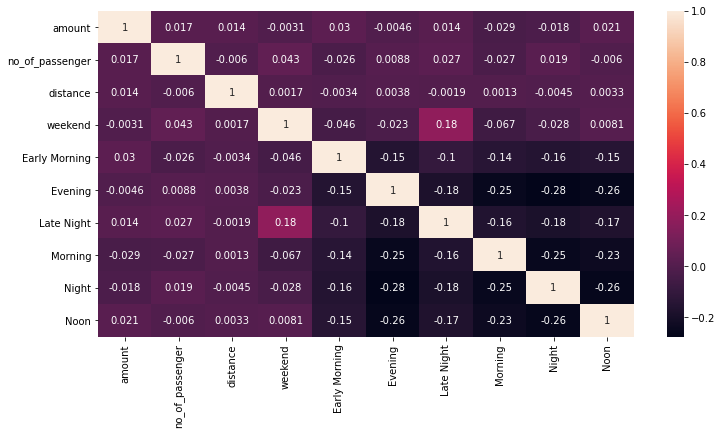

In [23]:
#Checking Correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='no_of_passenger', ylabel='distance'>

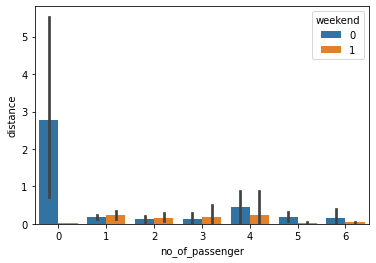

In [24]:
sns.barplot(x=df.no_of_passenger,y=df.distance,hue=df.weekend)

In [25]:
df.drop(df[df['no_of_passenger']==0].index,axis=0,inplace=True)
df

,amount,no_of_passenger,distance,weekend,Early Morning,Evening,Late Night,Morning,Night,Noon
0,4.5,1,0.009436,0,0,1,0,0,0,0
1,16.9,1,0.079696,0,0,1,0,0,0,0
2,5.7,2,0.013674,0,0,0,1,0,0,0
3,7.7,1,0.025340,1,1,0,0,0,0,0
4,5.3,1,0.019470,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,0,0,0,0,0,1,0
49996,7.5,1,0.008049,0,0,1,0,0,0,0
49997,6.9,1,0.020574,1,1,0,0,0,0,0
49998,4.5,2,0.007686,0,1,0,0,0,0,0


<AxesSubplot:>

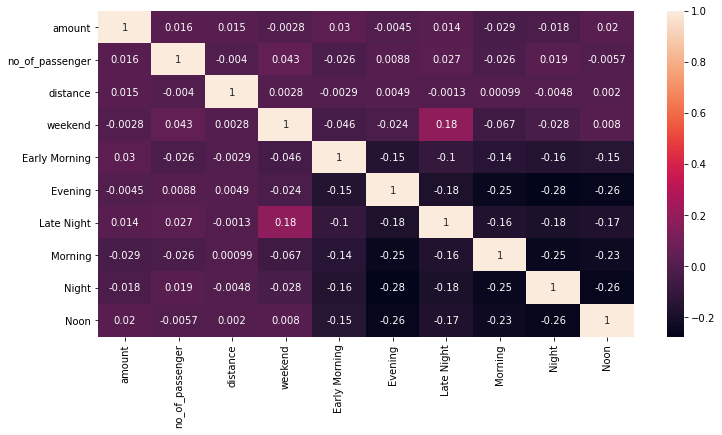

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [27]:
df.to_excel('taxii.xlsx')

## Assuming X and Y

In [28]:
#Independent Variable
X = df.drop(['amount'], axis=1)
#Dependent Variable
y = df[['amount']]

## Train-Test Split

In [30]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

## Linear Regression Model

In [31]:
#Fitting model with dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
#Train data
lr.score(X_train,y_train)

0.002627272359629451

In [33]:
#Test Data
lr.score(X_test,y_test)

0.002777974624536328

In [34]:
lr.predict(X_test)

array([[11.35585021],
       [10.81496364],
       [10.6971383 ],
       ...,
       [11.60631635],
       [12.16064861],
       [10.7902127 ]])

## Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeRegressor as dtr
dtree = dtr(max_depth=6)
dtree = dtree.fit(X_train, y_train)

In [36]:
#Train Score
print(dtree.score(X_train,y_train))

0.7572821534289012


In [37]:
#Test Score
print(dtree.score(X_test,y_test))

0.718548501788211


In [38]:
predict=dtree.predict(X_test).reshape(14948,1)


In [39]:
error=predict-y_test

In [40]:
error.sum()/len(y_test)

amount   -0.098947
dtype: float64

## Random Forest Regression Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, 
                               random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [42]:
#Train data
rf.score(X_train,y_train)*100

91.99645738612335

In [43]:
#Test Data
rf.score(X_test,y_test)*100

68.795512688972

In [44]:
rf.predict(X_test)

array([8.31433333, 4.8       , 4.793     , ..., 6.692     , 8.632     ,
       6.264     ])